In [98]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [99]:
# Load final data
final_data_df = pd.read_csv('./final_data.csv')
final_data_ueq_tlx_df = pd.read_csv('./final_data_ueq_tlx.csv')


In [100]:

# Filter out participants who according to their anwser to certain questions
# and therefore are not eligible for the study
final_data_df = final_data_df[final_data_df['DataProtectionAgreement'] == True]
final_data_df = final_data_df[final_data_df['LiabilityWaiverSigned'] == True]
final_data_df = final_data_df[final_data_df['HasPacemaker'] == False]
final_data_df = final_data_df[final_data_df['Colorblindness'] == False]
final_data_df = final_data_df[final_data_df['HandDominance'] == 'right']

# Plots

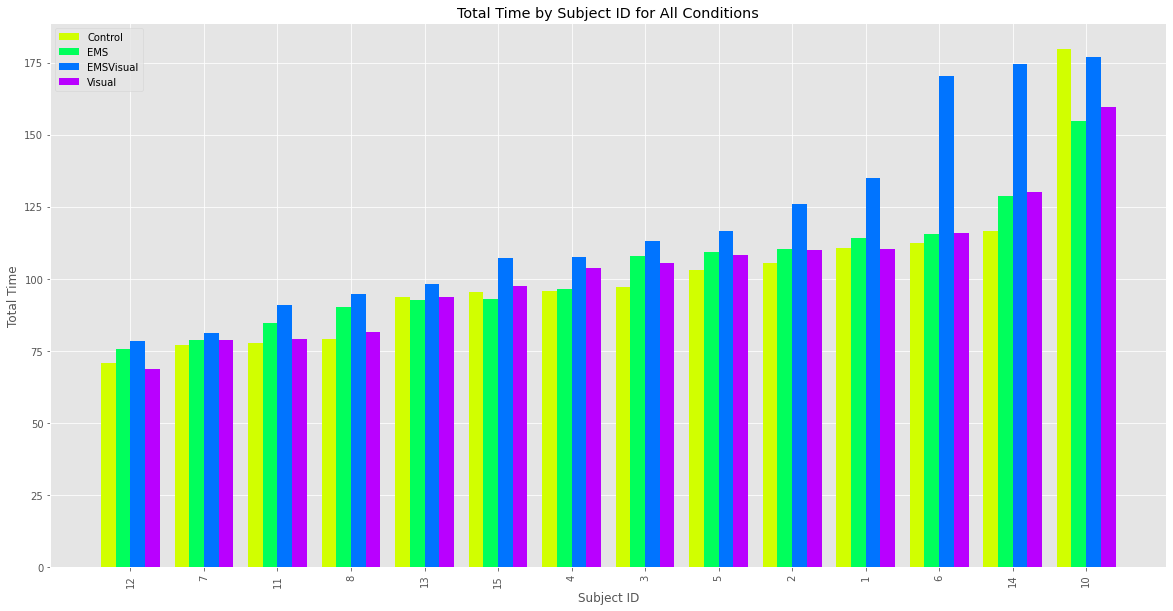

In [101]:
# Group by 'Condition' and 'SubjectID' and sum up the 'TotalTime'
grouped = final_data_df.groupby(['Condition', 'SubjectID'])['TotalTime'].sum().reset_index()

# Get unique conditions and a color palette
conditions = grouped['Condition'].unique()
plt.style.use('ggplot')

# Create the plot
plt.figure(figsize=(20,10))

# Define colors for each condition
colors = sns.color_palette('hsv', len(conditions)) 

# Bar width
width = 0.2

# For each condition, create a bar plot
for i, (condition, color) in enumerate(zip(conditions, colors)):
    # Filter rows for the condition
    subset = grouped[grouped['Condition'] == condition]
    
    # Sort the subset by 'TotalTime'
    subset = subset.sort_values('TotalTime')

    # Get the x position for each bar
    x = np.arange(len(subset['SubjectID'])) + i * width
    
    # Plot the bars for this condition
    plt.bar(x, subset['TotalTime'], width=width, color=color, label=condition)

# Set labels and title
plt.xlabel('Subject ID')
plt.ylabel('Total Time')
plt.title('Total Time by Subject ID for All Conditions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the x-ticks to be in the middle of the groups of bars
plt.xticks(np.arange(len(subset['SubjectID'])) + width * (len(conditions) - 1) / 2, subset['SubjectID'].astype(str))

# Show the legend
plt.legend()

# Show the plot
plt.show()


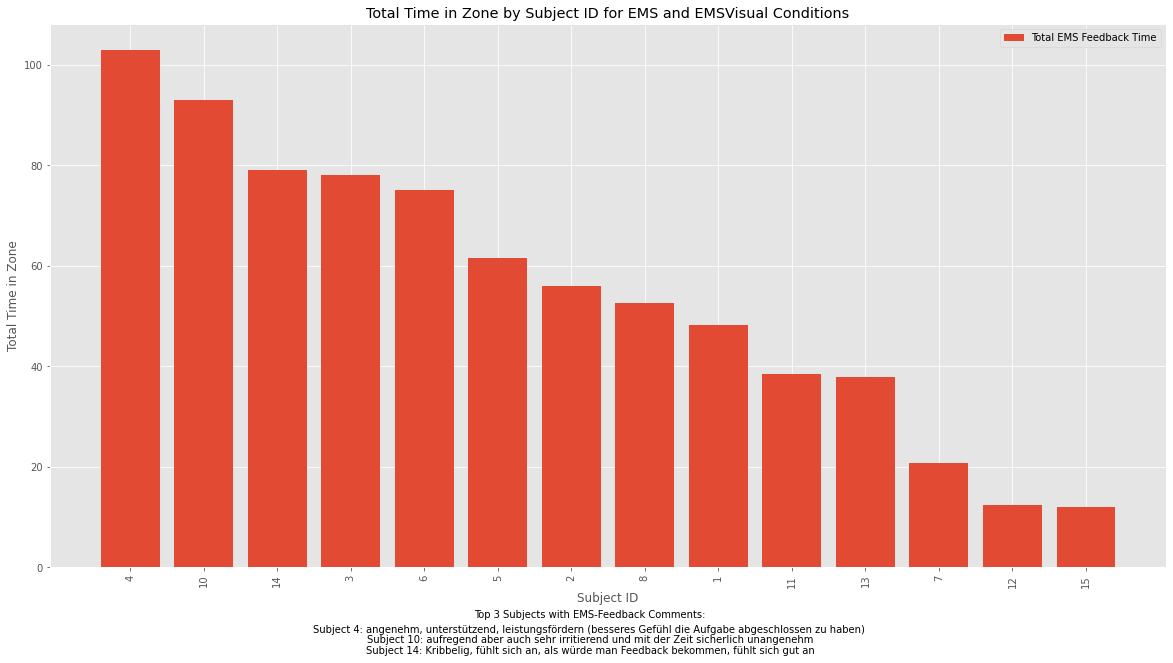

In [119]:
# Filter for the desired conditions
df_filtered = final_data_df[final_data_df['Condition'].isin(['EMS', 'EMSVisual'])]

# Group by 'SubjectID' and sum up 'TimeInZoneLow' and 'TimeInZoneHigh'
grouped = df_filtered.groupby(['SubjectID'])[['TimeInZoneLow', 'TimeInZoneHigh']].sum().reset_index()

# Calculate the total time for sorting
grouped['TotalTimeInZone'] = grouped['TimeInZoneLow'] + grouped['TimeInZoneHigh']

# Sort the data by total time
grouped_sorted = grouped.sort_values('TotalTimeInZone', ascending=False)

plt.figure(figsize=(20,10))

# x-axis positions
x = np.arange(len(grouped_sorted['SubjectID']))

# Create bar plot for total time in zone
plt.bar(x, grouped_sorted['TotalTimeInZone'], label='Total EMS Feedback Time')

# Get the top 3 SubjectIDs
top_3_subjects = grouped_sorted['SubjectID'].head(3)

# Add legend for the top 3 SubjectIDs
i = 0.035
plt.text(.5, 0.055, 'Top 3 Subjects with EMS-Feedback Comments:', ha='center', transform=plt.gcf().transFigure)
for subject in top_3_subjects:
    ems_value = final_data_df[final_data_df['SubjectID'] == subject]['EMS_Empfindung1'].iloc[0]
    plt.text(.5, i, f'Subject {subject}: {ems_value}', ha='center', transform=plt.gcf().transFigure)
    i -= 0.015

plt.xlabel('Subject ID')
plt.ylabel('Total Time in Zone')
plt.title('Total Time in Zone by Subject ID for EMS and EMSVisual Conditions')

# x-ticks for Subject IDs
plt.xticks(x, grouped_sorted['SubjectID'].astype(str), rotation=90)

plt.legend()
plt.show()


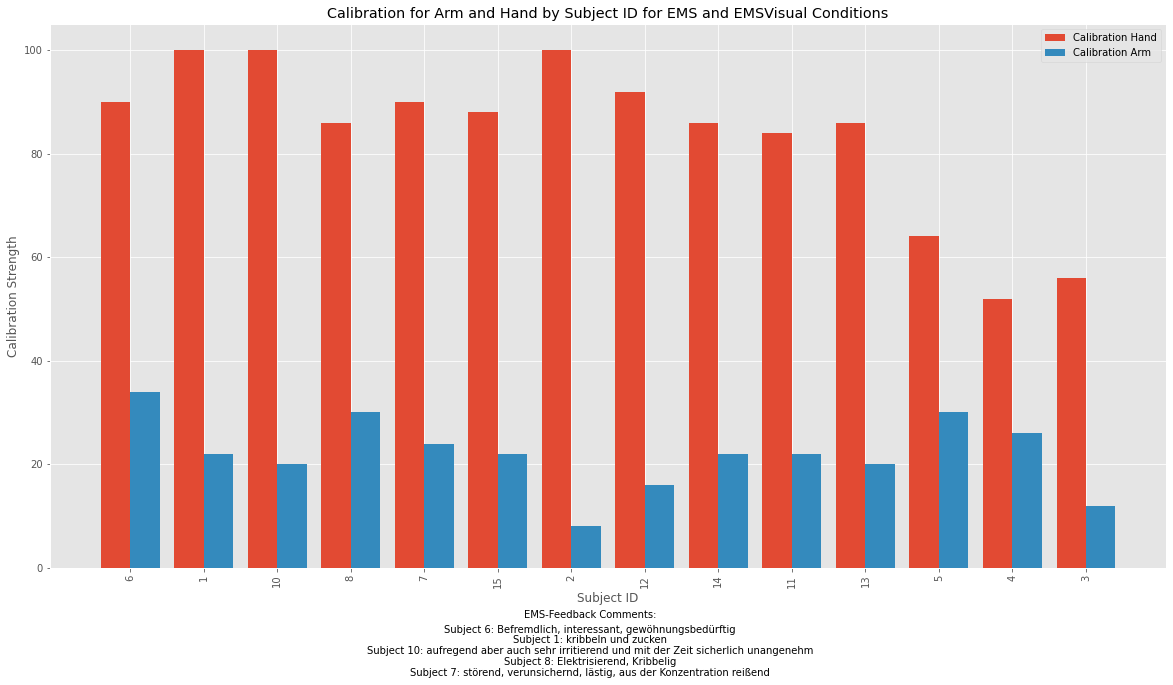

In [122]:
# Filter for the desired conditions
df_filtered = final_data_df[final_data_df['Condition'].isin(['EMS', 'EMSVisual'])]

grouped = df_filtered.groupby(['SubjectID'])[['Calibration Hand', 'Calibration Arm']].sum().reset_index()

# Calculate the total time for sorting
grouped['TotalCalibration'] = grouped['Calibration Hand'] + grouped['Calibration Arm']

# Sort the data by total time
grouped_sorted = grouped.sort_values('TotalCalibration', ascending=False)

fig = plt.figure(figsize=(20,10))

# Bar width
width = 0.4

# x-axis positions
x_low = np.arange(len(grouped_sorted['SubjectID']))
x_high = [x + width for x in x_low]

# Create bar plots
plt.bar(x_low, grouped_sorted['Calibration Hand'], width=width, label='Calibration Hand')
plt.bar(x_high, grouped_sorted['Calibration Arm'], width=width, label='Calibration Arm')

# Get the top 3 SubjectIDs
top_3_subjects = grouped_sorted['SubjectID'].head(5)

# Add legend for the top 3 SubjectIDs
i = 0.035
fig.text(.5, 0.055, 'EMS-Feedback Comments:', ha='center')
for subject in top_3_subjects:
    ems_value = final_data_df[final_data_df['SubjectID'] == subject]['EMS_Empfindung1'].iloc[0]
    fig.text(.5, i, f'Subject {subject}: {ems_value}', ha='center')
    i-=0.015

plt.xlabel('Subject ID')
plt.ylabel('Calibration Strength')
plt.title('Calibration for Arm and Hand by Subject ID for EMS and EMSVisual Conditions')

# Set the x-ticks to the middle of the groups of bars
plt.xticks([r + width / 2 for r in range(len(grouped_sorted['SubjectID']))], grouped_sorted['SubjectID'].astype(str), rotation=90)

plt.legend()
plt.show()


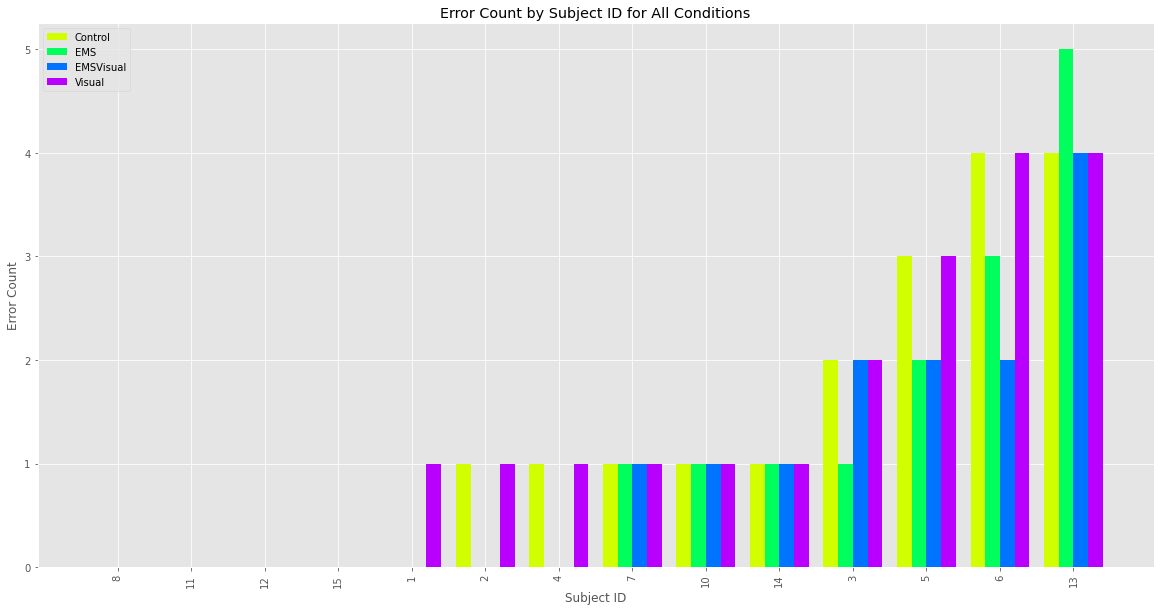

In [103]:
# Group by 'Condition' and 'SubjectID' and sum up the 'TotalTime'
grouped = final_data_df.groupby(['Condition', 'SubjectID'])['ErrorCount'].sum().reset_index()

# Get unique conditions and a color palette
conditions = grouped['Condition'].unique()
colors = sns.color_palette('hsv', len(conditions)) 
plt.style.use('ggplot')

# Create the plot
plt.figure(figsize=(20,10))

# Bar width
width = 0.2

# For each condition, create a bar plot
for i, (condition, color) in enumerate(zip(conditions, colors)):
    # Filter rows for the condition
    subset = grouped[grouped['Condition'] == condition]
    
    # Sort the subset by 'ErrorCount'
    subset = subset.sort_values('ErrorCount')

    # Get the x position for each bar
    x = np.arange(len(subset['SubjectID'])) + i * width
    
    # Plot the bars for this condition
    plt.bar(x, subset['ErrorCount'], width=width, color=color, label=condition)

# Set labels and title
plt.xlabel('Subject ID')
plt.ylabel('Error Count')
plt.title('Error Count by Subject ID for All Conditions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the x-ticks to be in the middle of the groups of bars
plt.xticks(np.arange(len(subset['SubjectID'])) + width * (len(conditions) - 1) / 2, subset['SubjectID'].astype(str))

# Show the legend
plt.legend()

# Show the plot
plt.show()


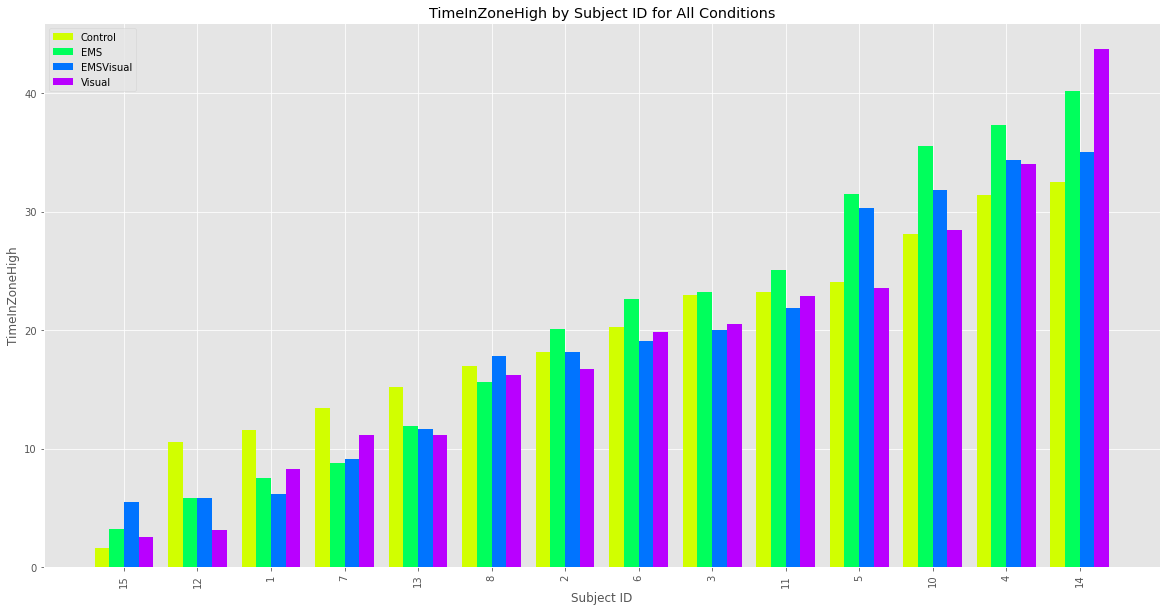

In [104]:
# Group by 'Condition' and 'SubjectID' and sum up the 'TotalTime'
grouped = final_data_df.groupby(['Condition', 'SubjectID'])['TimeInZoneHigh'].sum().reset_index()

# Get unique conditions and a color palette
conditions = grouped['Condition'].unique()
colors = sns.color_palette('hsv', len(conditions))  # get a color palette with as many colors as there are conditions

# Create the plot
plt.figure(figsize=(20,10))

# Bar width
width = 0.2

# For each condition, create a bar plot
for i, (condition, color) in enumerate(zip(conditions, colors)):
    # Filter rows for the condition
    subset = grouped[grouped['Condition'] == condition]
    
    # Sort the subset by 'TimeInZoneHigh'
    subset = subset.sort_values('TimeInZoneHigh')

    # Get the x position for each bar
    x = np.arange(len(subset['SubjectID'])) + i * width
    
    # Plot the bars for this condition
    plt.bar(x, subset['TimeInZoneHigh'], width=width, color=color, label=condition)

# Set labels and title
plt.xlabel('Subject ID')
plt.ylabel('TimeInZoneHigh')
plt.title('TimeInZoneHigh by Subject ID for All Conditions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the x-ticks to be in the middle of the groups of bars
plt.xticks(np.arange(len(subset['SubjectID'])) + width * (len(conditions) - 1) / 2, subset['SubjectID'].astype(str))

# Show the legend
plt.legend()

# Show the plot
plt.show()


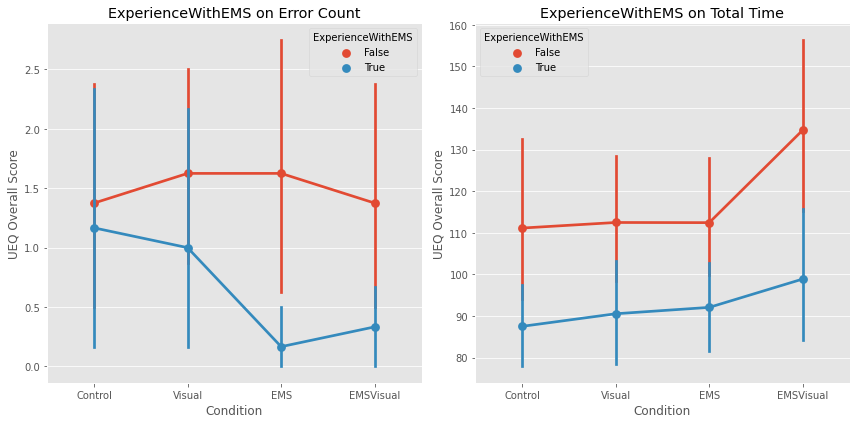

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.pointplot(x="Condition", y="ErrorCount", hue="ExperienceWithEMS", data=final_data_ueq_tlx_df)
plt.title('ExperienceWithEMS on Error Count')
plt.xlabel('Condition')
plt.ylabel('UEQ Overall Score')

plt.subplot(1, 2, 2)
sns.pointplot(x="Condition", y="TotalTime", hue="ExperienceWithEMS", data=final_data_ueq_tlx_df)
plt.title('ExperienceWithEMS on Total Time')
plt.xlabel('Condition')
plt.ylabel('UEQ Overall Score')

plt.tight_layout()
plt.show()


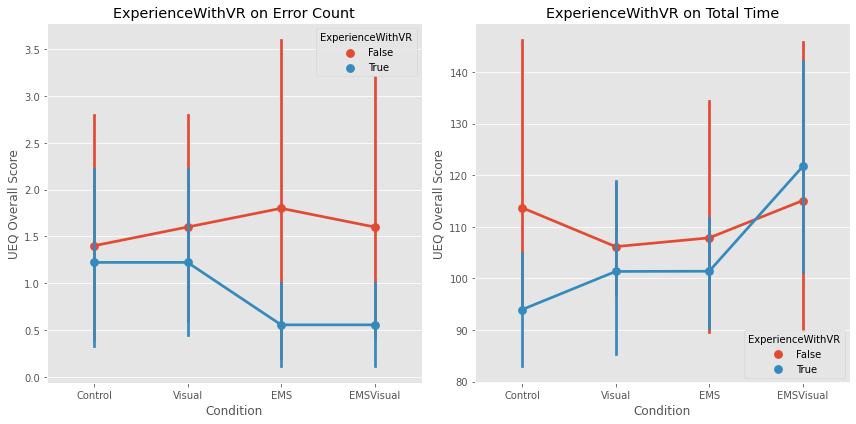

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.pointplot(x="Condition", y="ErrorCount", hue="ExperienceWithVR", data=final_data_ueq_tlx_df)
plt.title('ExperienceWithVR on Error Count')
plt.xlabel('Condition')
plt.ylabel('UEQ Overall Score')

plt.subplot(1, 2, 2)
sns.pointplot(x="Condition", y="TotalTime", hue="ExperienceWithVR", data=final_data_ueq_tlx_df)
plt.title('ExperienceWithVR on Total Time')
plt.xlabel('Condition')
plt.ylabel('UEQ Overall Score')

plt.tight_layout()
plt.show()


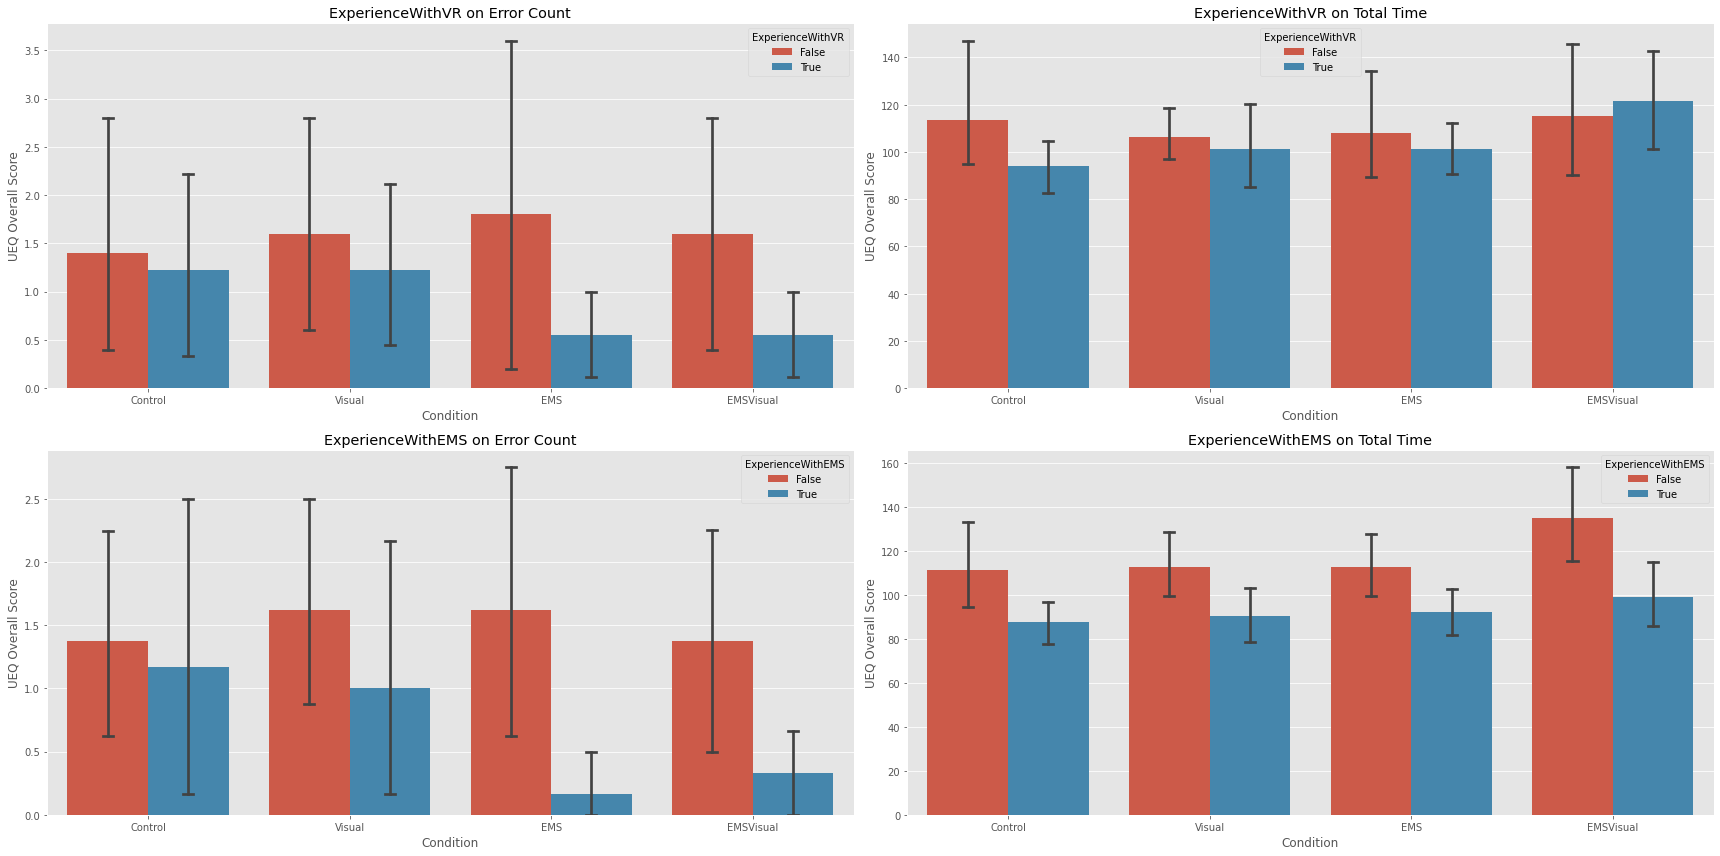

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))

# For ExperienceWithVR
# Error Count
plt.subplot(2, 2, 1)
sns.barplot(x="Condition", y="ErrorCount", hue="ExperienceWithVR", data=final_data_ueq_tlx_df,capsize=.05)
plt.title('ExperienceWithVR on Error Count')
plt.xlabel('Condition')
plt.ylabel('UEQ Overall Score')

# Total Time
plt.subplot(2, 2, 2)
sns.barplot(x="Condition", y="TotalTime", hue="ExperienceWithVR", data=final_data_ueq_tlx_df,capsize=.05)
plt.title('ExperienceWithVR on Total Time')
plt.xlabel('Condition')
plt.ylabel('UEQ Overall Score')

# For ExperienceWithEMS
# Error Count
plt.subplot(2, 2, 3)
sns.barplot(x="Condition", y="ErrorCount", hue="ExperienceWithEMS", data=final_data_ueq_tlx_df,capsize=.05)
plt.title('ExperienceWithEMS on Error Count')
plt.xlabel('Condition')
plt.ylabel('UEQ Overall Score')

# Total Time
plt.subplot(2, 2, 4)
sns.barplot(x="Condition", y="TotalTime", hue="ExperienceWithEMS", data=final_data_ueq_tlx_df,capsize=.05)
plt.title('ExperienceWithEMS on Total Time')
plt.xlabel('Condition')
plt.ylabel('UEQ Overall Score')

plt.tight_layout()
plt.show()


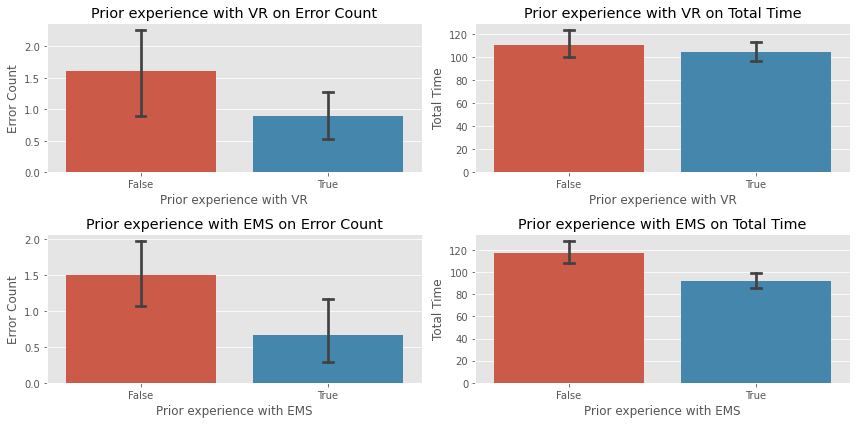

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# For ExperienceWithVR
# Error Count
plt.subplot(2, 2, 1)
sns.barplot(x="ExperienceWithVR", y="ErrorCount",
            data=final_data_ueq_tlx_df, capsize=.05)
plt.title('Prior experience with VR on Error Count')
plt.xlabel('Prior experience with VR')
plt.ylabel('Error Count')

# Total Time
plt.subplot(2, 2, 2)
sns.barplot(x="ExperienceWithVR", y="TotalTime",
            data=final_data_ueq_tlx_df, capsize=.05)
plt.title('Prior experience with VR on Total Time')
plt.xlabel('Prior experience with VR')
plt.ylabel('Total Time')

# For ExperienceWithEMS
# Error Count
plt.subplot(2, 2, 3)
sns.barplot(x="ExperienceWithEMS", y="ErrorCount",
            data=final_data_ueq_tlx_df, capsize=.05)
plt.title('Prior experience with EMS on Error Count')
plt.xlabel('Prior experience with EMS')
plt.ylabel('Error Count')

# Total Time
plt.subplot(2, 2, 4)
sns.barplot(x="ExperienceWithEMS", y="TotalTime",
            data=final_data_ueq_tlx_df, capsize=.05)
plt.title('Prior experience with EMS on Total Time')
plt.xlabel('Prior experience with EMS')
plt.ylabel('Total Time')

plt.tight_layout()
plt.show()

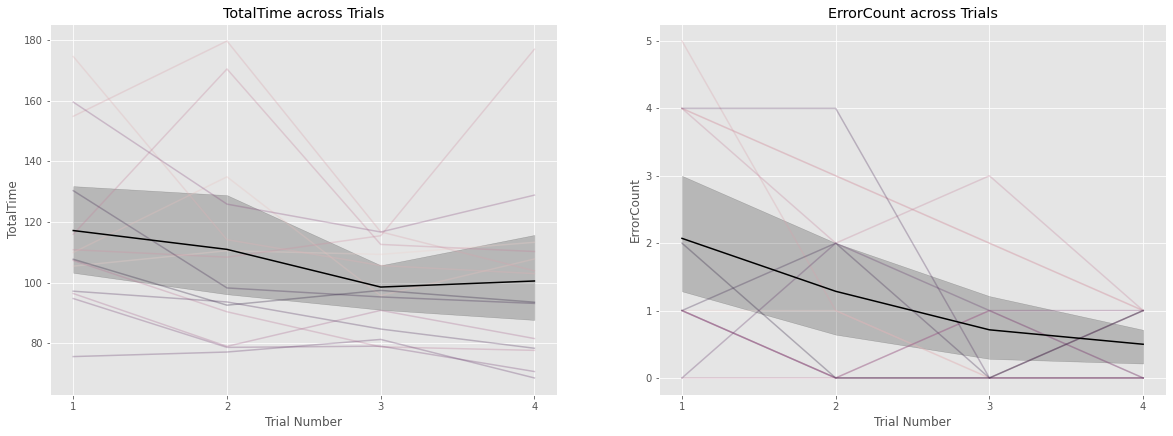

In [109]:
final_data_df['Trial'] = ((final_data_df.index) % 4) + 1
plt.style.use('ggplot')

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.lineplot(data=final_data_df, x='Trial', y='TotalTime', hue='SubjectID', legend=False, alpha=0.3)
sns.lineplot(data=final_data_df, x='Trial', y='TotalTime', color='black', estimator='mean')
plt.title('TotalTime across Trials')
plt.ylabel('TotalTime')
plt.xlabel('Trial Number')
plt.xticks([1, 2, 3, 4])  # Set x-axis ticks

# Plotting TotalTime
plt.subplot(2, 2, 2)
sns.lineplot(data=final_data_df, x='Trial', y='ErrorCount', hue='SubjectID', legend=False, alpha=0.3)
sns.lineplot(data=final_data_df, x='Trial', y='ErrorCount', color='black', estimator='mean')
plt.title('ErrorCount across Trials')
plt.ylabel('ErrorCount')
plt.xlabel('Trial Number')
plt.xticks([1, 2, 3, 4])  # Set x-axis ticks

plt.show()


In [110]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

final_data_df['Trial'] = ((final_data_df.index) % 4) + 1

# Calculate the mean for TotalTime and ErrorCount for each trial
table = final_data_df.groupby('Trial').agg({
    'TotalTime': 'mean',
    'ErrorCount': 'mean'
}).reset_index()
print(table)
print("")

# Create a Trial column based on the repetition per SubjectID
final_data_df['Trial'] = final_data_df.groupby('SubjectID').cumcount() + 1

# Pivot the data
df_wide_total_time = final_data_df.pivot(
    index='SubjectID', columns='Trial', values='TotalTime').reset_index()
df_wide_error_count = final_data_df.pivot(
    index='SubjectID', columns='Trial', values='ErrorCount').reset_index()

# Melt the wide data back to long for the ANOVA, since AnovaRM uses long format
df_long_total_time = df_wide_total_time.melt(
    id_vars='SubjectID', value_name='TotalTime', var_name='Trial')
df_long_error_count = df_wide_error_count.melt(
    id_vars='SubjectID', value_name='ErrorCount', var_name='Trial')

# Repeated Measures ANOVA
anova_total_time = AnovaRM(
    data=df_long_total_time, depvar='TotalTime', subject='SubjectID', within=['Trial'])
result_total_time = anova_total_time.fit()
print("ANOVA RM TotalTime")
print(result_total_time.summary())

anova_error_count = AnovaRM(
    data=df_long_error_count, depvar='ErrorCount', subject='SubjectID', within=['Trial'])
result_error_count = anova_error_count.fit()
print("ANOVA RM ErrorCount")
print(result_error_count.summary())

   Trial   TotalTime  ErrorCount
0      1  117.145882    2.071429
1      2  110.944589    1.285714
2      3   98.524124    0.714286
3      4  100.520243    0.500000

ANOVA RM TotalTime
               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
Trial  3.0519 3.0000 39.0000 0.0397

ANOVA RM ErrorCount
               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
Trial  7.2222 3.0000 39.0000 0.0006



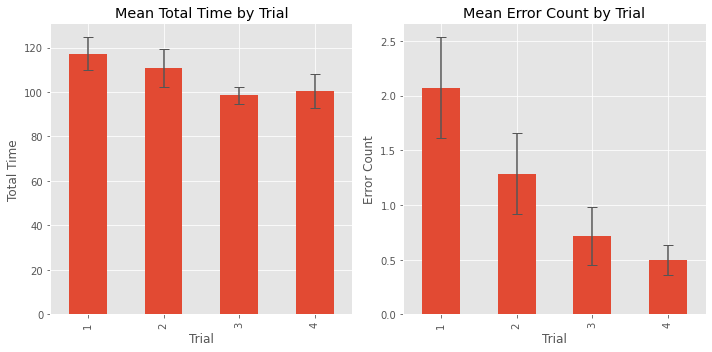

In [111]:
mean_times = final_data_df.groupby('Trial')['TotalTime'].mean()
mean_errors = final_data_df.groupby('Trial')['ErrorCount'].mean()
sem_times = final_data_df.groupby('Trial')['TotalTime'].sem()
sem_errors = final_data_df.groupby('Trial')['ErrorCount'].sem()
colors = sns.color_palette('hsv', len(conditions))  # get a color palette with as many colors as there are conditions

plt.figure(figsize=(10, 5))
plt.style.use('ggplot')

# Plotting for TotalTime
plt.subplot(1, 2, 1)
mean_times.plot(kind='bar', yerr=sem_times, capsize=5)
plt.title('Mean Total Time by Trial')
plt.ylabel('Total Time')

# Plotting for ErrorCount
plt.subplot(1, 2, 2)
mean_errors.plot(kind='bar', yerr=sem_errors, capsize=5)
plt.title('Mean Error Count by Trial')
plt.ylabel('Error Count')

plt.tight_layout()
plt.show()



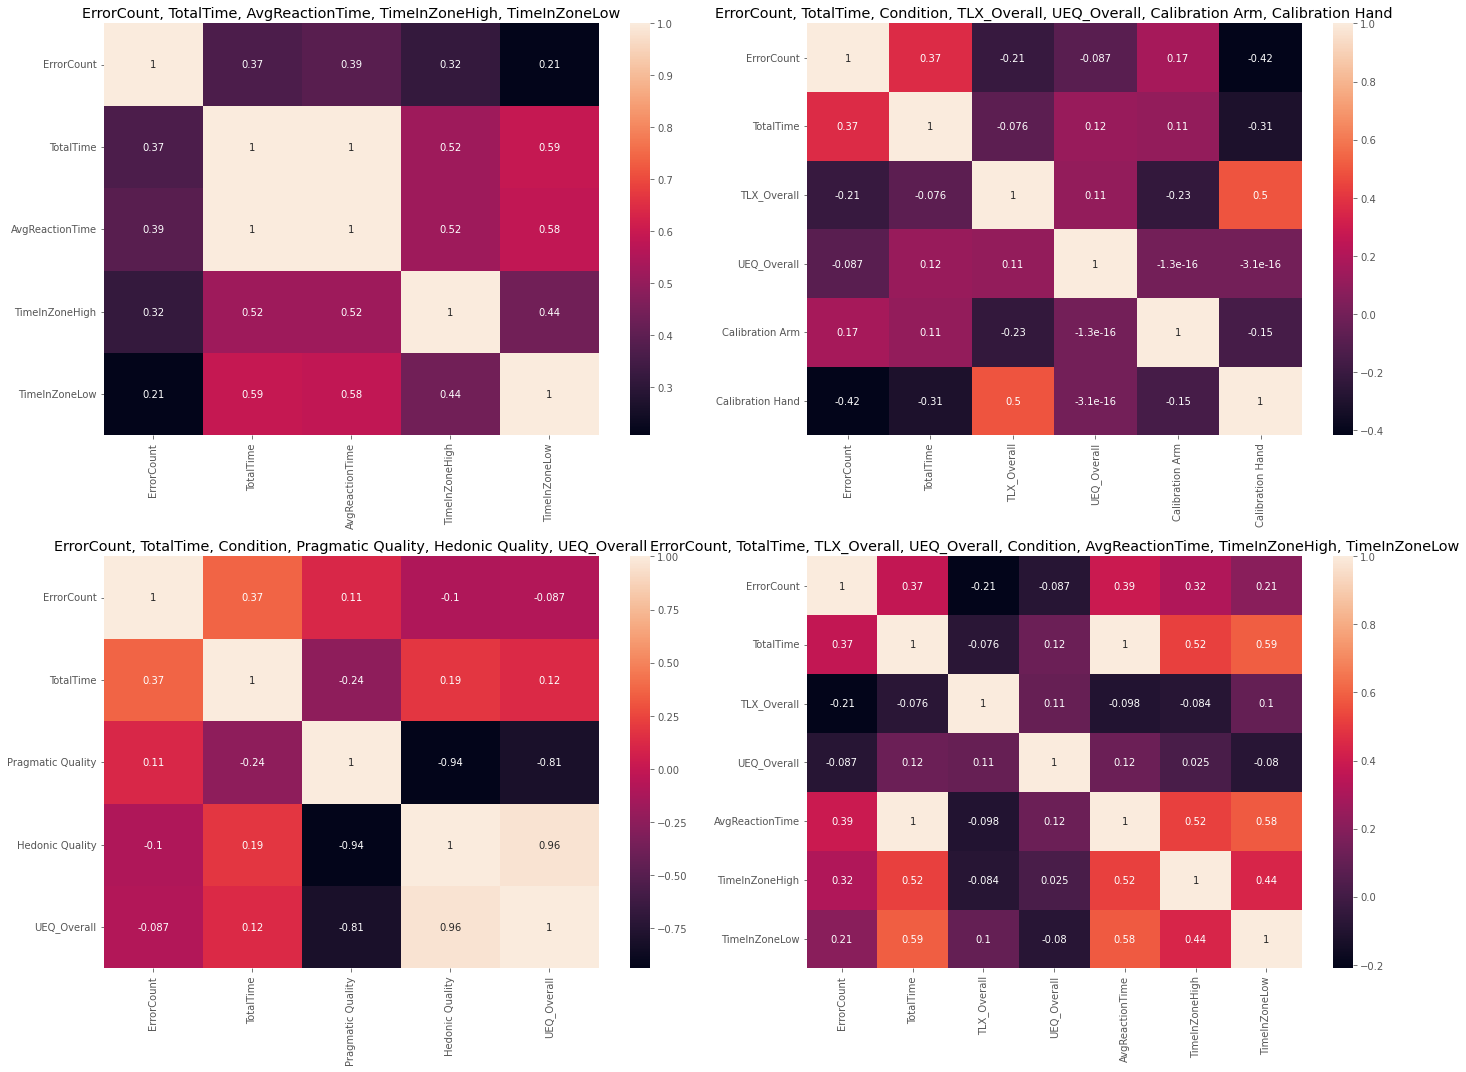

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
correlation_matrix = final_data_ueq_tlx_df[['ErrorCount', 'TotalTime', 'AvgReactionTime', 'TimeInZoneHigh', 'TimeInZoneLow']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('ErrorCount, TotalTime, AvgReactionTime, TimeInZoneHigh, TimeInZoneLow')

plt.subplot(2, 2, 2)
correlation_matrix = final_data_ueq_tlx_df[['ErrorCount', 'TotalTime', 'Condition', 'TLX_Overall', 'UEQ_Overall','Calibration Arm','Calibration Hand']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('ErrorCount, TotalTime, Condition, TLX_Overall, UEQ_Overall, Calibration Arm, Calibration Hand')

plt.subplot(2, 2, 3)
correlation_matrix = final_data_ueq_tlx_df[['ErrorCount', 'TotalTime', 'Condition', 'Pragmatic Quality', 'Hedonic Quality', 'UEQ_Overall']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('ErrorCount, TotalTime, Condition, Pragmatic Quality, Hedonic Quality, UEQ_Overall')

plt.subplot(2, 2, 4)
correlation_matrix = final_data_ueq_tlx_df[['ErrorCount', 'TotalTime', 'TLX_Overall', 'UEQ_Overall', 'Condition', 'AvgReactionTime','TimeInZoneHigh','TimeInZoneLow']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('ErrorCount, TotalTime, TLX_Overall, UEQ_Overall, Condition, AvgReactionTime, TimeInZoneHigh, TimeInZoneLow')

plt.tight_layout()
plt.show()


In [113]:
# Kruskal-Wallis H test
# Perform the test separately for each dependent variable (e.g., Error Count, Reaction Time, etc.)
error_count_stat, error_count_p = stats.kruskal(final_data_ueq_tlx_df[final_data_ueq_tlx_df['Condition'] == 'Control']['ErrorCount'], 
                                                 final_data_ueq_tlx_df[final_data_ueq_tlx_df['Condition'] == 'Visual']['ErrorCount'], 
                                                 final_data_ueq_tlx_df[final_data_ueq_tlx_df['Condition'] == 'EMS']['ErrorCount'], 
                                                 final_data_ueq_tlx_df[final_data_ueq_tlx_df['Condition'] == 'EMSVisual']['ErrorCount'])

# Print out the p-value to check for significance
print('Kruskal-Wallis H Test Error Count P-value: ', error_count_p)

# Repeat this for all other dependent variables, replacing 'ErrorCount' with the appropriate column name

# Multiple Regression Analysis
final_data_ueq_tlx_df['Control'] = (final_data_ueq_tlx_df['Condition'] == 'Control').astype(int)
final_data_ueq_tlx_df['Visual'] = (final_data_ueq_tlx_df['Condition'] == 'Visual').astype(int)
final_data_ueq_tlx_df['EMS'] = (final_data_ueq_tlx_df['Condition'] == 'EMS').astype(int)
final_data_ueq_tlx_df['EMSVisual'] = (final_data_ueq_tlx_df['Condition'] == 'EMSVisual').astype(int)

# Define dependent variable (e.g., Error Count)
Y = final_data_ueq_tlx_df['ErrorCount']

# Define independent variables, including the interaction terms
X = final_data_ueq_tlx_df[['Visual', 'EMS', 'EMSVisual', 'UEQ_Overall', 'TLX_Overall']]
X['Interaction_1'] = X['Visual'] * X['EMS']
X['Interaction_2'] = X['Visual'] * X['EMSVisual']
X['Interaction_3'] = X['EMS'] * X['EMSVisual']

# Add an intercept to the independent variables matrix
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print out the model's summary
print(model.summary())


Kruskal-Wallis H Test Error Count P-value:  0.7074535782576472
                            OLS Regression Results                            
Dep. Variable:             ErrorCount   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.7819
Date:                Wed, 23 Aug 2023   Prob (F-statistic):              0.542
Time:                        16:38:52   Log-Likelihood:                -94.268
No. Observations:                  56   AIC:                             198.5
Df Residuals:                      51   BIC:                             208.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

C:\Users\timm_\AppData\Local\Temp\ipykernel_19608\3220929964.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Interaction_1'] = X['Visual'] * X['EMS']
C:\Users\timm_\AppData\Local\Temp\ipykernel_19608\3220929964.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Interaction_2'] = X['Visual'] * X['EMSVisual']
C:\Users\timm_\AppData\Local\Temp\ipykernel_19608\3220929964.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Kruskal-Wallis H Test:

P-value: 0.7074 - the groups being tested do not have statistically significant differences in their median values of 'ErrorCount' at a 0.05 significance level.


OLS Regression Results:
(attempts to explain the variation in 'ErrorCount' using several predictor variables)

Key Insights:
- R-squared: 0.058 - Only 5.8% of the variability in 'ErrorCount' is explained by the predictor variables in the model.
- Adjusted R-squared: -0.016 - This value is even smaller (and negative) when accounting for the number of predictors, suggesting the model isn't that effective.
- F-statistic and its P-value: The F-statistic is low, and the p-value is high (0.542), suggesting that, as a whole, the predictors are not jointly statistically significant in explaining 'ErrorCount'.

Individual Coefficients:

- const: The constant (or intercept) term suggests that when all predictor variables are zero, the average 'ErrorCount' is estimated to be 1.4317.
- Visual, EMS, EMSVisual: These predictors aren't statistically significant in explaining 'ErrorCount' as their p-values are all greater than 0.05.
- UEQ_Overall: A one-unit increase in UEQ_Overall is associated with an increase of 0.6182 in 'ErrorCount' on average, holding other variables constant. This is statistically significant at the 0.05 level.
- TLX_Overall: Not statistically significant.

In [114]:
# Kruskal-Wallis H test
# Perform the test separately for each dependent variable (e.g., Error Count, Reaction Time, etc.)
error_count_stat, error_count_p = stats.kruskal(final_data_ueq_tlx_df[final_data_ueq_tlx_df['Condition'] == 'Control']['ErrorCount'], 
                                                 final_data_ueq_tlx_df[final_data_ueq_tlx_df['Condition'] == 'Visual']['ErrorCount'], 
                                                 final_data_ueq_tlx_df[final_data_ueq_tlx_df['Condition'] == 'EMS']['ErrorCount'], 
                                                 final_data_ueq_tlx_df[final_data_ueq_tlx_df['Condition'] == 'EMSVisual']['ErrorCount'])

# Print out the p-value to check for significance
print('Kruskal-Wallis H Test Error Count P-value: ', error_count_p)

# Repeat this for all other dependent variables, replacing 'ErrorCount' with the appropriate column name

# Multiple Regression Analysis
final_data_ueq_tlx_df['Control'] = (final_data_ueq_tlx_df['Condition'] == 'Control').astype(int)
final_data_ueq_tlx_df['Visual'] = (final_data_ueq_tlx_df['Condition'] == 'Visual').astype(int)
final_data_ueq_tlx_df['EMS'] = (final_data_ueq_tlx_df['Condition'] == 'EMS').astype(int)
final_data_ueq_tlx_df['EMSVisual'] = (final_data_ueq_tlx_df['Condition'] == 'EMSVisual').astype(int)

# Define dependent variable (e.g., Error Count)
Y = final_data_ueq_tlx_df['TotalTime']

# Define independent variables, including the interaction terms
X = final_data_ueq_tlx_df[['Visual', 'EMS', 'EMSVisual', 'UEQ_Overall', 'TLX_Overall']]
X['Interaction_1'] = X['Visual'] * X['EMS']
X['Interaction_2'] = X['Visual'] * X['EMSVisual']
X['Interaction_3'] = X['EMS'] * X['EMSVisual']

# Add an intercept to the independent variables matrix
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print out the model's summary
print(model.summary())


Kruskal-Wallis H Test Error Count P-value:  0.7074535782576472
                            OLS Regression Results                            
Dep. Variable:              TotalTime   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.216
Date:                Wed, 23 Aug 2023   Prob (F-statistic):              0.316
Time:                        16:38:52   Log-Likelihood:                -260.82
No. Observations:                  56   AIC:                             531.6
Df Residuals:                      51   BIC:                             541.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

C:\Users\timm_\AppData\Local\Temp\ipykernel_19608\1715288102.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Interaction_1'] = X['Visual'] * X['EMS']
C:\Users\timm_\AppData\Local\Temp\ipykernel_19608\1715288102.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Interaction_2'] = X['Visual'] * X['EMSVisual']
C:\Users\timm_\AppData\Local\Temp\ipykernel_19608\1715288102.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [115]:
final_data_ueq_tlx_df['Control'] = (
    final_data_ueq_tlx_df['Condition'] == 'Control').astype(int)
final_data_ueq_tlx_df['Visual'] = (
    final_data_ueq_tlx_df['Condition'] == 'Visual').astype(int)
final_data_ueq_tlx_df['EMS'] = (
    final_data_ueq_tlx_df['Condition'] == 'EMS').astype(int)
final_data_ueq_tlx_df['EMSVisual'] = (
    final_data_ueq_tlx_df['Condition'] == 'EMSVisual').astype(int)

# Define dependent variable (Error Count, Total Time)
Y = final_data_ueq_tlx_df['TotalTime']

# Define independent variables, excluding the interaction terms for now
X = final_data_ueq_tlx_df[['Visual', 'EMS',
                           'EMSVisual', 'UEQ_Overall', 'TLX_Overall']]
X['Interaction_UEQ_1'] = X['UEQ_Overall'] * X['Visual']
X['Interaction_UEQ_1'] = X['UEQ_Overall'] * X['EMS']
X['Interaction_UEQ_1'] = X['UEQ_Overall'] * X['EMSVisual']
X['Interaction_TLX_1'] = X['TLX_Overall'] * X['Visual']
X['Interaction_TLX_1'] = X['TLX_Overall'] * X['EMS']
X['Interaction_TLX_1'] = X['TLX_Overall'] * X['EMSVisual']
# X['Interaction_2'] = X['Visual'] * X['EMSVisual']
# X['Interaction_3'] = X['EMS'] * X['EMSVisual']
# Add an intercept to the independent variables matrix
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print out the model's summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              TotalTime   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.340
Date:                Wed, 23 Aug 2023   Prob (F-statistic):              0.263
Time:                        16:38:52   Log-Likelihood:                -259.85
No. Observations:                  56   AIC:                             531.7
Df Residuals:                      50   BIC:                             543.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.6069     11.04

C:\Users\timm_\AppData\Local\Temp\ipykernel_19608\3485826146.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Interaction_UEQ_1'] = X['UEQ_Overall'] * X['Visual']
C:\Users\timm_\AppData\Local\Temp\ipykernel_19608\3485826146.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Interaction_UEQ_1'] = X['UEQ_Overall'] * X['EMS']
C:\Users\timm_\AppData\Local\Temp\ipykernel_19608\3485826146.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

Some variables like EMS and UEQ_Overall are significant.